# Comparing the effect of wind direction on PM conc.

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import datetime
from scipy import stats

# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-paper')
sns.set_theme(style="ticks", color_codes=True)

In [2]:
dfmod = pd.read_csv('data/aqi_data_mod.csv')
dfobs = pd.read_csv('data/aqi_data_obs.csv')

In [3]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

In [4]:
dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [5]:
dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

In [6]:
dfmod.drop(['datetime'], axis=1, inplace=True)
dfobs.drop(['datetime'], axis=1, inplace=True)

In [7]:
# Do interpolatoin of the observed data

dfobs = dfobs.interpolate(method = 'time')

In [8]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
dtype: int64

In [9]:
df = pd.concat([dfmod, dfobs], axis=1)

In [10]:
dfnov = df.loc["2020-11-01":"2020-11-30"]
dfdec = df.loc["2020-12-01":"2020-12-31"]
dfjan = df.loc["2021-01-01":"2021-01-31"]

In [11]:
dfjan.tail()

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev
datetime,,,,,,,,
2021-01-31 19:00:00,262.13,176.70,477.64,333.23,283.41,132.55,473.15,212.18
2021-01-31 20:00:00,280.50,190.57,515.65,363.73,258.25,111.13,404.22,162.62
2021-01-31 21:00:00,280.55,165.43,531.10,333.06,259.50,102.70,420.72,145.34
2021-01-31 22:00:00,317.31,179.83,602.42,358.34,279.51,105.07,433.31,156.45
2021-01-31 23:00:00,346.14,208.83,654.82,396.42,264.59,84.86,419.70,138.79


In [12]:
metnov = pd.read_csv('./data/met_data_nov_utc.csv')
metdec = pd.read_csv('./data/met_data_dec_utc.csv')
metjan = pd.read_csv('./data/met_data_jan_utc.csv')

In [13]:
metnov['datetime'] = pd.to_datetime(metnov.date) + pd.to_timedelta(metnov.hour)
metdec['datetime'] = pd.to_datetime(metdec.time)
metjan['datetime'] = pd.to_datetime(metjan.datetime)

In [14]:
metnov = metnov.set_index(metnov.datetime)
metdec = metdec.set_index(metdec.datetime)
metjan = metjan.set_index(metjan.datetime)

metnov.drop(['date', 'hour', 'datetime'], axis=1, inplace=True)
metdec.drop(['time', 'datetime'], axis=1, inplace=True)
metjan.drop(['datetime'], axis=1, inplace=True)

In [15]:
# Add the missing values of datetime in November and December as NaN

idx_nov = pd.date_range('2020-11-01 00:00:00','2020-11-30 23:00:00', freq='H')
idx_dec = pd.date_range('2020-12-01 00:00:00','2020-12-31 23:00:00', freq='H')

metnov = metnov.reindex(idx_nov, fill_value=np.nan)
metdec = metdec.reindex(idx_dec, fill_value=np.nan)

In [16]:
met = pd.concat([metnov, metdec, metjan], axis=0)

In [17]:
met_aqi = pd.concat([df,met], axis=1)
met_aqi_nov = pd.concat([dfnov, metnov], axis=1)
met_aqi_dec = pd.concat([dfdec, metdec], axis=1)
met_aqi_jan = pd.concat([dfjan, metjan], axis=1)

In [18]:
# met_aqi.drop(['datetime'], inplace=True, axis=1)
# met_aqi_nov.drop(['datetime'], inplace=True, axis=1)
# met_aqi_dec.drop(['datetime'], inplace=True, axis=1)
# met_aqi_jan.drop(['datetime'], inplace=True, axis=1)

In [19]:
wd_aqi = met_aqi[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_wd', 'obs_wd']]
wd_aqi_nov = met_aqi_nov[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_wd', 'obs_wd']]
wd_aqi_dec = met_aqi_dec[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_wd', 'obs_wd']]
wd_aqi_jan = met_aqi_jan[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_wd', 'obs_wd']]

In [20]:
wd_aqi.tail()

,mod_PM2.5,mod_PM10,obs_PM2.5,obs_PM10,mod_wd,obs_wd
2021-01-31 19:00:00,262.13,477.64,283.41,473.15,NaN,NaN
2021-01-31 20:00:00,280.50,515.65,258.25,404.22,NaN,NaN
2021-01-31 21:00:00,280.55,531.10,259.50,420.72,NaN,NaN
2021-01-31 22:00:00,317.31,602.42,279.51,433.31,NaN,NaN
2021-01-31 23:00:00,346.14,654.82,264.59,419.70,NaN,NaN


In [21]:
wd_aqi.isna().sum()

mod_PM2.5      0
mod_PM10       0
obs_PM2.5      0
obs_PM10       0
mod_wd       326
obs_wd       245
dtype: int64

### Analysing the effect of wind direction on PM concentration

#### Average PM concentration for each wind direction for the winter season

In [22]:
# wd_aqi['mod_nwind'] = [1 if x >= 337.5 and x < 22.5 else 0 for x in wd_aqi["mod_wd"]]
# wd_aqi['obs_nwind'] = [1 if x >= 337.5 and x < 22.5 else 0 for x in wd_aqi["obs_wd"]]

# wd_aqi['mod_newind'] = [1 if x >= 22.5 and x < 67.5 else 0 for x in wd_aqi["mod_wd"]]
# wd_aqi['obs_newind'] = [1 if x >= 22.5 and x < 67.5 else 0 for x in wd_aqi["obs_wd"]]

# wd_aqi['mod_ewind'] = [1 if x >= 67.5 and x < 112.5 else 0 for x in wd_aqi["mod_wd"]]
# wd_aqi['obs_ewind'] = [1 if x >= 67.5 and x < 112.5 else 0 for x in wd_aqi["obs_wd"]]

# wd_aqi['mod_sewind'] = [1 if x >= 112.5 and x < 157.5 else 0 for x in wd_aqi["mod_wd"]]
# wd_aqi['obs_sewind'] = [1 if x >= 112.5 and x < 157.5 else 0 for x in wd_aqi["obs_wd"]]

# wd_aqi['mod_swind'] = [1 if x >= 157.5 and x < 202.5 else 0 for x in wd_aqi["mod_wd"]]
# wd_aqi['obs_swind'] = [1 if x >= 157.5 and x < 202.5 else 0 for x in wd_aqi["obs_wd"]]

# wd_aqi['mod_swwind'] = [1 if x >= 202.5 and x < 247.5 else 0 for x in wd_aqi["mod_wd"]]
# wd_aqi['obs_swwind'] = [1 if x >= 202.5 and x < 247.5 else 0 for x in wd_aqi["obs_wd"]]

# wd_aqi['mod_wwind'] = [1 if x >= 247.5 and x < 292.5 else 0 for x in wd_aqi["mod_wd"]]
# wd_aqi['obs_wwind'] = [1 if x >= 247.5 and x < 292.5 else 0 for x in wd_aqi["obs_wd"]]

# wd_aqi['mod_nwwind'] = [1 if x >= 292.5 and x < 337.5 else 0 for x in wd_aqi["mod_wd"]]
# wd_aqi['obs_nwwind'] = [1 if x >= 292.5 and x < 337.5 else 0 for x in wd_aqi["obs_wd"]]

In [23]:
wd_aqi['mod_newind'] = [1 if x >= 0 and x < 90 else 0 for x in wd_aqi["mod_wd"]]
wd_aqi['obs_newind'] = [1 if x >= 0 and x < 90 else 0 for x in wd_aqi["obs_wd"]]

wd_aqi['mod_sewind'] = [1 if x >= 90 and x < 180 else 0 for x in wd_aqi["mod_wd"]]
wd_aqi['obs_sewind'] = [1 if x >= 90 and x < 180 else 0 for x in wd_aqi["obs_wd"]]

wd_aqi['mod_swwind'] = [1 if x >= 180 and x < 270 else 0 for x in wd_aqi["mod_wd"]]
wd_aqi['obs_swwind'] = [1 if x >= 180 and x < 270 else 0 for x in wd_aqi["obs_wd"]]

wd_aqi['mod_nwwind'] = [1 if x >= 270 and x < 360 else 0 for x in wd_aqi["mod_wd"]]
wd_aqi['obs_nwwind'] = [1 if x >= 270 and x < 360 else 0 for x in wd_aqi["obs_wd"]]

/tmp/ipykernel_190205/2782795832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_aqi['mod_newind'] = [1 if x >= 0 and x < 90 else 0 for x in wd_aqi["mod_wd"]]
/tmp/ipykernel_190205/2782795832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_aqi['obs_newind'] = [1 if x >= 0 and x < 90 else 0 for x in wd_aqi["obs_wd"]]
/tmp/ipykernel_190205/2782795832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [24]:
wd_aqi.head(30)

,mod_PM2.5,mod_PM10,obs_PM2.5,obs_PM10,mod_wd,obs_wd,mod_newind,obs_newind,mod_sewind,obs_sewind,mod_swwind,obs_swwind,mod_nwwind,obs_nwwind
2020-11-01 00:00:00,152.61,241.71,387.900,561.4400,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-01 01:00:00,159.82,254.49,348.110,486.0400,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-01 02:00:00,160.04,252.47,326.030,516.6700,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-01 03:00:00,156.73,242.03,302.900,514.4100,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-01 04:00:00,156.32,232.03,309.050,520.5500,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-01 05:00:00,157.04,231.33,253.670,459.1000,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-01 06:00:00,141.07,203.85,174.090,346.1400,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-01 07:00:00,100.28,139.01,117.410,278.7600,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-01 08:00:00,70.95,97.52,77.560,199.3700,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-01 09:00:00,65.83,90.71,66.400,185.8200,NaN,NaN,0,0,0,0,0,0,0,0


In [25]:
wind_count = (wd_aqi.resample('D').sum()).drop(['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_wd', 'obs_wd'], axis=1)

In [26]:
wind_count.shape

(92, 8)

In [27]:
pm_conc_avg = (wd_aqi.resample('D').mean()).drop(['mod_newind', 'mod_sewind', 'mod_swwind', 'mod_nwwind', 'obs_newind','obs_sewind', 'obs_swwind', 'obs_nwwind'], axis=1)

In [28]:
pm_conc_max = (wd_aqi.resample('D').max()).drop(['mod_newind','mod_sewind', 'mod_swwind', 'mod_nwwind', 'obs_newind', 'obs_sewind', 'obs_swwind','obs_nwwind'], axis=1)

In [29]:
pm_conc_avg.shape

(92, 6)

In [30]:
pm_conc_max.shape

(92, 6)

In [31]:
pm_wind_avg = pd.concat([pm_conc_avg, wind_count], axis = 1)
pm_wind_max = pd.concat([pm_conc_max, wind_count], axis = 1)

In [32]:
pm_wind_max.head()

,mod_PM2.5,mod_PM10,obs_PM2.5,obs_PM10,mod_wd,obs_wd,mod_newind,obs_newind,mod_sewind,obs_sewind,mod_swwind,obs_swwind,mod_nwwind,obs_nwwind
2020-11-01,185.66,361.90,387.90,561.44,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-02,250.95,515.14,209.28,474.76,NaN,NaN,0,0,0,0,0,0,0,0
2020-11-03,395.07,779.29,188.00,428.25,NaN,321.0125,0,1,0,5,0,5,0,4
2020-11-04,484.51,738.60,422.00,673.19,344.67102,296.5097,0,1,0,0,7,6,8,17
2020-11-05,326.28,594.43,333.65,530.65,352.93005,316.9403,3,0,1,5,9,4,11,15


In [33]:
pm_wind_avg_nov = pm_wind_avg.loc["2020-11-01":"2020-11-30"]
pm_wind_avg_dec = pm_wind_avg.loc["2020-12-01":"2020-12-31"]
pm_wind_avg_jan = pm_wind_avg.loc["2021-01-01":"2021-01-31"]

pm_wind_max_nov = pm_wind_max.loc["2020-11-01":"2020-11-30"]
pm_wind_max_dec = pm_wind_max.loc["2020-12-01":"2020-12-31"]
pm_wind_max_jan = pm_wind_max.loc["2021-01-01":"2021-01-31"]

In [34]:
# fig,ax1 = plt.subplots(figsize = (15,5))
# ax1.bar(x = pm_wind_max_nov.index, height = pm_wind_max_nov['obs_PM2.5'], color = 'darkblue', alpha=0.2, label='Max')
# ax1.bar(x = pm_wind_avg_nov.index, height = pm_wind_avg_nov['obs_PM2.5'], color = 'tab:blue', alpha=0.7, label='Average')
# ax1.set_ylabel('Observation PM$_{2.5}$ concentration ($\mu g m^{-3}$)', labelpad=12, fontsize=13)
# ax1.set_xlabel('Dates', labelpad=12, fontsize=13)

# ax2 = ax1.twinx()
# ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
# ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
# ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
# ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')
# ax2.set_ylabel('Wind occuring Frequency (%)', labelpad=12, fontsize=13)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
# plt.gcf().autofmt_xdate()
# ax1.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
# ax2.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
# plt.title('November (Observation)', fontsize=17)
# fig.tight_layout()

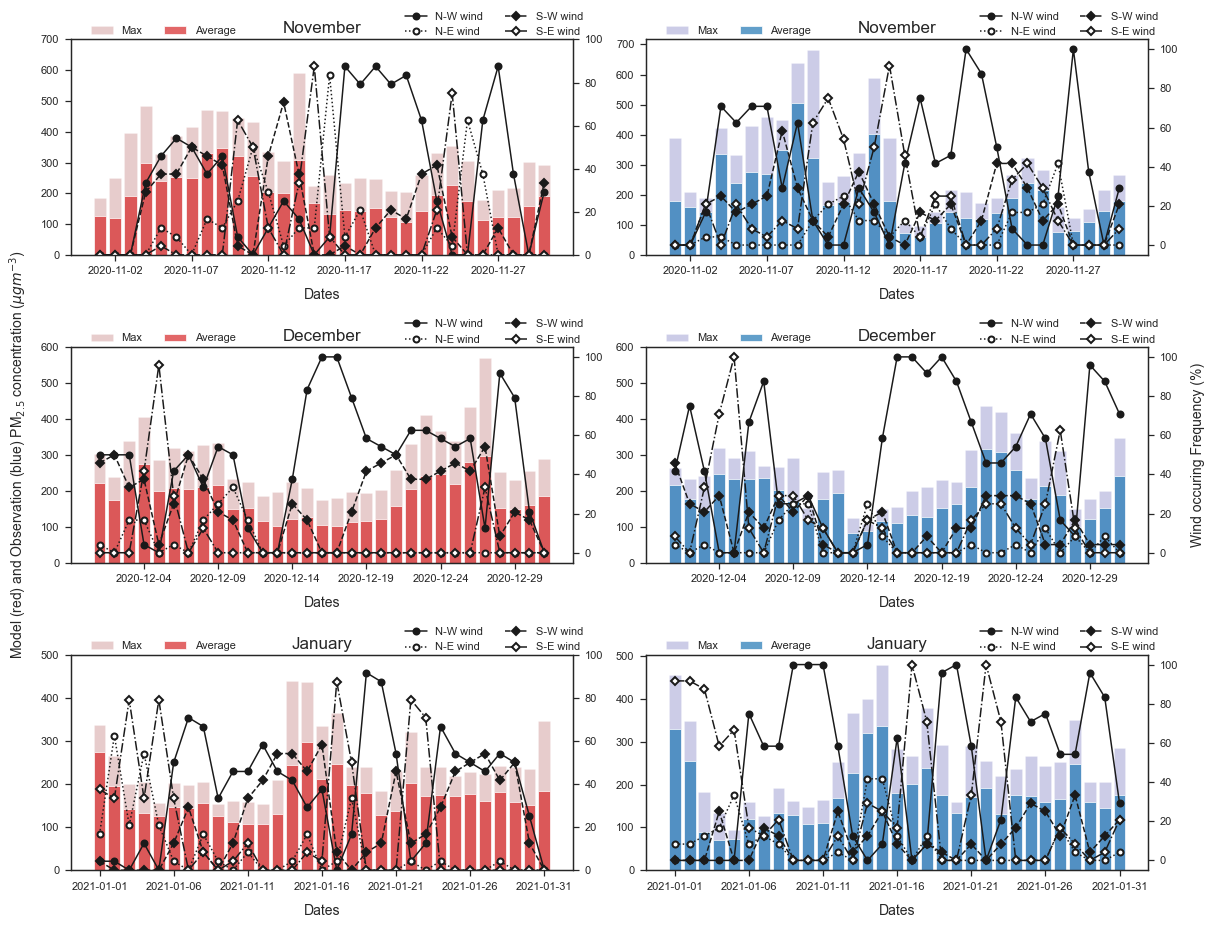

In [35]:
# PM2.5

fig = plt.figure(figsize = (17,13))
ax1 = plt.subplot(321)

ax1.bar(x = pm_wind_max_nov.index, height = pm_wind_max_nov['mod_PM2.5'], color = 'darkred', alpha=0.2, label='Max')
ax1.bar(x = pm_wind_avg_nov.index, height = pm_wind_avg_nov['mod_PM2.5'], color = 'tab:red', alpha=0.7, label='Average')
# ax1.set_ylabel('Model PM$_{2.5}$ concentration ($\mu g m^{-3}$)', labelpad=12, fontsize=14)
ax1.set_ylim(0,700)
ax1.set_xlabel('Dates', labelpad=12, fontsize=14)
# ax1.tick_params('x', labelrotation=45)

ax2 = ax1.twinx()
ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['mod_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['mod_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['mod_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['mod_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')
ax2.set_ylim(0,100)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax1.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax2.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('November', fontsize=17)

ax3 = plt.subplot(322)
ax3.bar(x = pm_wind_max_nov.index, height = pm_wind_max_nov['obs_PM2.5'], color = 'darkblue', alpha=0.2, label='Max')
ax3.bar(x = pm_wind_avg_nov.index, height = pm_wind_avg_nov['obs_PM2.5'], color = 'tab:blue', alpha=0.7, label='Average')
ax3.set_xlabel('Dates', labelpad=12, fontsize=14)
# ax3.tick_params('x', labelrotation=45)

ax4= ax3.twinx()
ax4.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax4.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax4.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax4.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')
# ax01.set_ylabel('Wind occuring Frequency (%)', labelpad=12, fontsize=14)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax3.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax4.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('November', fontsize=17)

#--------------
ax5 = plt.subplot(323)
ax5.bar(x = pm_wind_max_dec.index, height = pm_wind_max_dec['mod_PM2.5'], color = 'darkred', alpha=0.2, label='Max')
ax5.bar(x = pm_wind_avg_dec.index, height = pm_wind_avg_dec['mod_PM2.5'], color = 'tab:red', alpha=0.7, label='Average')
ax5.set_ylim(0,600)
ax5.set_ylabel('Model (red) and Observation (blue) PM$_{2.5}$ concentration ($\mu g m^{-3}$)', labelpad=12, fontsize=14)
ax5.set_xlabel('Dates', labelpad=12, fontsize=14)
# ax5.tick_params('x', labelrotation=45)

ax6 = ax5.twinx()
ax6.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['mod_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax6.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['mod_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax6.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['mod_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax6.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['mod_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax5.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax6.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('December', fontsize=17)

ax7 = plt.subplot(324)
ax7.bar(x = pm_wind_max_dec.index, height = pm_wind_max_dec['obs_PM2.5'], color = 'darkblue', alpha=0.2, label='Max')
ax7.bar(x = pm_wind_avg_dec.index, height = pm_wind_avg_dec['obs_PM2.5'], color = 'tab:blue', alpha=0.7, label='Average')
ax7.set_ylim(0,600)
ax7.set_xlabel('Dates', labelpad=12, fontsize=14)
# ax7.tick_params('x', labelrotation=45)

ax8 = ax7.twinx()
ax8.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['obs_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax8.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['obs_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax8.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['obs_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax8.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['obs_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')
ax8.set_ylabel('Wind occuring Frequency (%)', labelpad=13, fontsize=14)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax7.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax8.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('December', fontsize=17)

#--------------

ax9 = plt.subplot(325)
ax9.bar(x = pm_wind_max_jan.index, height = pm_wind_max_jan['mod_PM2.5'], color = 'darkred', alpha=0.2, label='Max')
ax9.bar(x = pm_wind_avg_jan.index, height = pm_wind_avg_jan['mod_PM2.5'], color = 'tab:red', alpha=0.7, label='Average')
ax9.set_xlabel('Dates', labelpad=12, fontsize=14)
ax9.set_ylim(0,500)
# ax9.tick_params('x', labelrotation=45)

ax10 = ax9.twinx()
ax10.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['mod_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax10.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['mod_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax10.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['mod_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax10.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['mod_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')
ax10.set_ylim(0,100)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax9.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax10.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('January', fontsize=17)

ax11 = plt.subplot(326)
ax11.bar(x = pm_wind_max_jan.index, height = pm_wind_max_jan['obs_PM2.5'], color = 'darkblue', alpha=0.2, label='Max')
ax11.bar(x = pm_wind_avg_jan.index, height = pm_wind_avg_jan['obs_PM2.5'], color = 'tab:blue', alpha=0.7, label='Average')
ax11.set_xlabel('Dates', labelpad=12, fontsize=14)
# ax11.tick_params('x', labelrotation=45)

ax12 = ax11.twinx()
ax12.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['obs_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax12.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['obs_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax12.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['obs_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax12.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['obs_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax11.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax12.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('January', fontsize=17)

# fig.autofmt_xdate()
fig.tight_layout()
plt.savefig('./images/met_aqi_compare/wd_pm25.pdf', dpi=300)

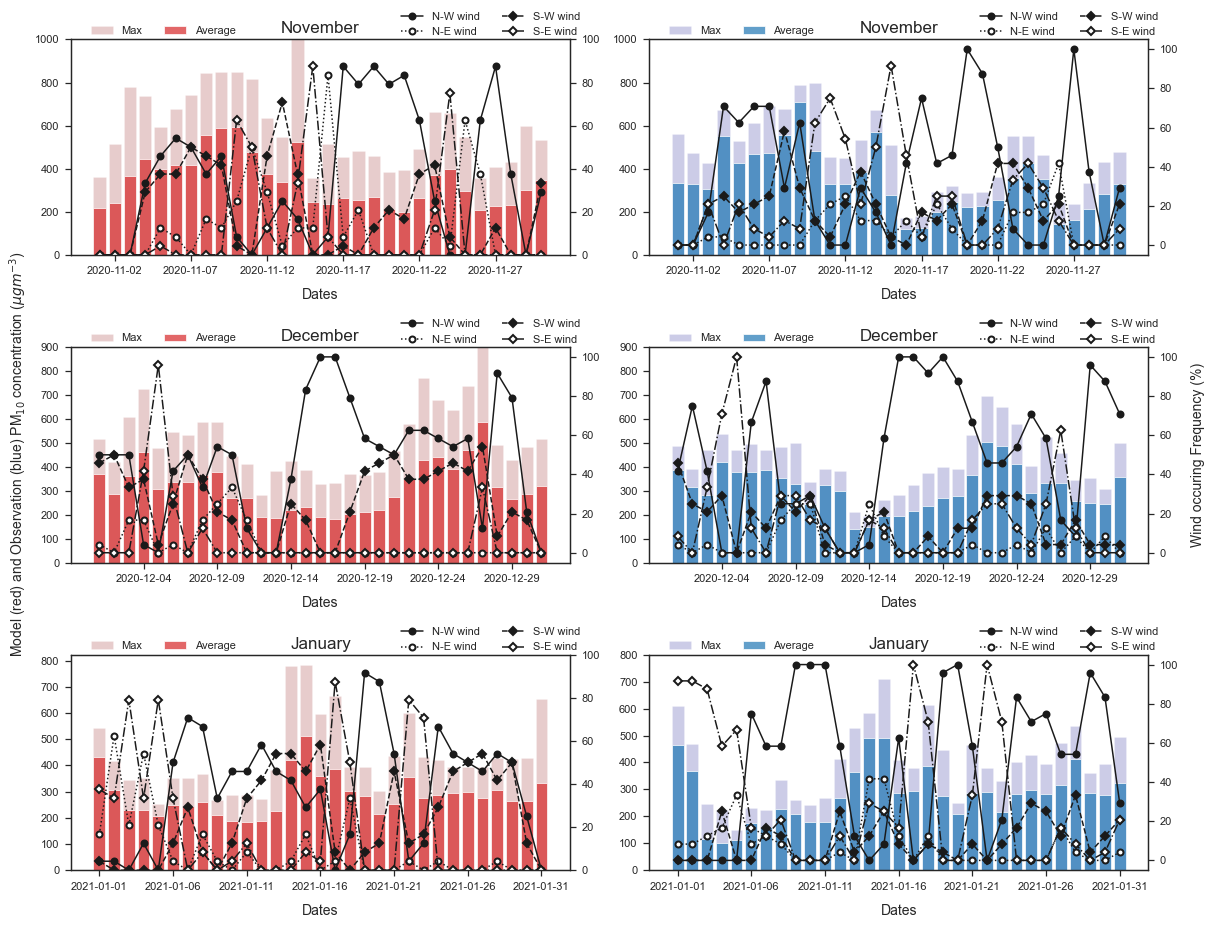

In [36]:
# PM10

fig = plt.figure(figsize = (17,13))
ax1 = plt.subplot(321)

ax1.bar(x = pm_wind_max_nov.index, height = pm_wind_max_nov['mod_PM10'], color = 'darkred', alpha=0.2, label='Max')
ax1.bar(x = pm_wind_avg_nov.index, height = pm_wind_avg_nov['mod_PM10'], color = 'tab:red', alpha=0.7, label='Average')
# ax1.set_ylabel('Model PM$_{10}$ concentration ($\mu g m^{-3}$)', labelpad=12, fontsize=14)
ax1.set_ylim(0,1000)
ax1.set_xlabel('Dates', labelpad=12, fontsize=14)
# ax1.tick_params('x', labelrotation=45)

ax2 = ax1.twinx()
ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['mod_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['mod_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['mod_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax2.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['mod_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')
ax2.set_ylim(0,100)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax1.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax2.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('November', fontsize=17)

ax3 = plt.subplot(322)
ax3.bar(x = pm_wind_max_nov.index, height = pm_wind_max_nov['obs_PM10'], color = 'darkblue', alpha=0.2, label='Max')
ax3.bar(x = pm_wind_avg_nov.index, height = pm_wind_avg_nov['obs_PM10'], color = 'tab:blue', alpha=0.7, label='Average')
ax3.set_xlabel('Dates', labelpad=12, fontsize=14)
ax3.set_ylim(0,1000)
# ax3.tick_params('x', labelrotation=45)

ax4= ax3.twinx()
ax4.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax4.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax4.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax4.plot(pm_wind_avg_nov.index, (pm_wind_avg_nov['obs_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')
# ax01.set_ylabel('Wind occuring Frequency (%)', labelpad=12, fontsize=14)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax3.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax4.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('November', fontsize=17)

#--------------
ax5 = plt.subplot(323)
ax5.bar(x = pm_wind_max_dec.index, height = pm_wind_max_dec['mod_PM10'], color = 'darkred', alpha=0.2, label='Max')
ax5.bar(x = pm_wind_avg_dec.index, height = pm_wind_avg_dec['mod_PM10'], color = 'tab:red', alpha=0.7, label='Average')
ax5.set_ylim(0,900)
ax5.set_ylabel('Model (red) and Observation (blue) PM$_{10}$ concentration ($\mu g m^{-3}$)', labelpad=12, fontsize=14)
ax5.set_xlabel('Dates', labelpad=12, fontsize=14)
# ax5.tick_params('x', labelrotation=45)

ax6 = ax5.twinx()
ax6.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['mod_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax6.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['mod_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax6.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['mod_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax6.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['mod_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax5.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax6.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('December', fontsize=17)

ax7 = plt.subplot(324)
ax7.bar(x = pm_wind_max_dec.index, height = pm_wind_max_dec['obs_PM10'], color = 'darkblue', alpha=0.2, label='Max')
ax7.bar(x = pm_wind_avg_dec.index, height = pm_wind_avg_dec['obs_PM10'], color = 'tab:blue', alpha=0.7, label='Average')
ax7.set_ylim(0,900)
ax7.set_xlabel('Dates', labelpad=12, fontsize=14)
# ax7.tick_params('x', labelrotation=45)

ax8 = ax7.twinx()
ax8.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['obs_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax8.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['obs_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax8.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['obs_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax8.plot(pm_wind_avg_dec.index, (pm_wind_avg_dec['obs_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')
ax8.set_ylabel('Wind occuring Frequency (%)', labelpad=13, fontsize=14)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax7.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax8.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('December', fontsize=17)

#--------------

ax9 = plt.subplot(325)
ax9.bar(x = pm_wind_max_jan.index, height = pm_wind_max_jan['mod_PM10'], color = 'darkred', alpha=0.2, label='Max')
ax9.bar(x = pm_wind_avg_jan.index, height = pm_wind_avg_jan['mod_PM10'], color = 'tab:red', alpha=0.7, label='Average')
ax9.set_xlabel('Dates', labelpad=12, fontsize=14)
# ax9.set_ylim(0,500)
# ax9.tick_params('x', labelrotation=45)

ax10 = ax9.twinx()
ax10.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['mod_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax10.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['mod_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax10.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['mod_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax10.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['mod_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')
ax10.set_ylim(0,100)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax9.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax10.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('January', fontsize=17)

ax11 = plt.subplot(326)
ax11.bar(x = pm_wind_max_jan.index, height = pm_wind_max_jan['obs_PM10'], color = 'darkblue', alpha=0.2, label='Max')
ax11.bar(x = pm_wind_avg_jan.index, height = pm_wind_avg_jan['obs_PM10'], color = 'tab:blue', alpha=0.7, label='Average')
ax11.set_xlabel('Dates', labelpad=12, fontsize=14)
ax11.set_ylim(0,800)
# ax11.tick_params('x', labelrotation=45)

ax12 = ax11.twinx()
ax12.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['obs_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='2', color='k', label='N-W wind')
ax12.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['obs_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='2', color='k',  label = 'N-E wind')
ax12.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['obs_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='2', color='k', label = 'S-W wind')
ax12.plot(pm_wind_avg_jan.index, (pm_wind_avg_jan['obs_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='2', color='k', label = 'S-E wind')

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax11.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.11))
ax12.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.04, 1.07))
plt.title('January', fontsize=17)

# fig.autofmt_xdate()
fig.tight_layout()
plt.savefig('./images/met_aqi_compare/wd_pm10.pdf', dpi=300)

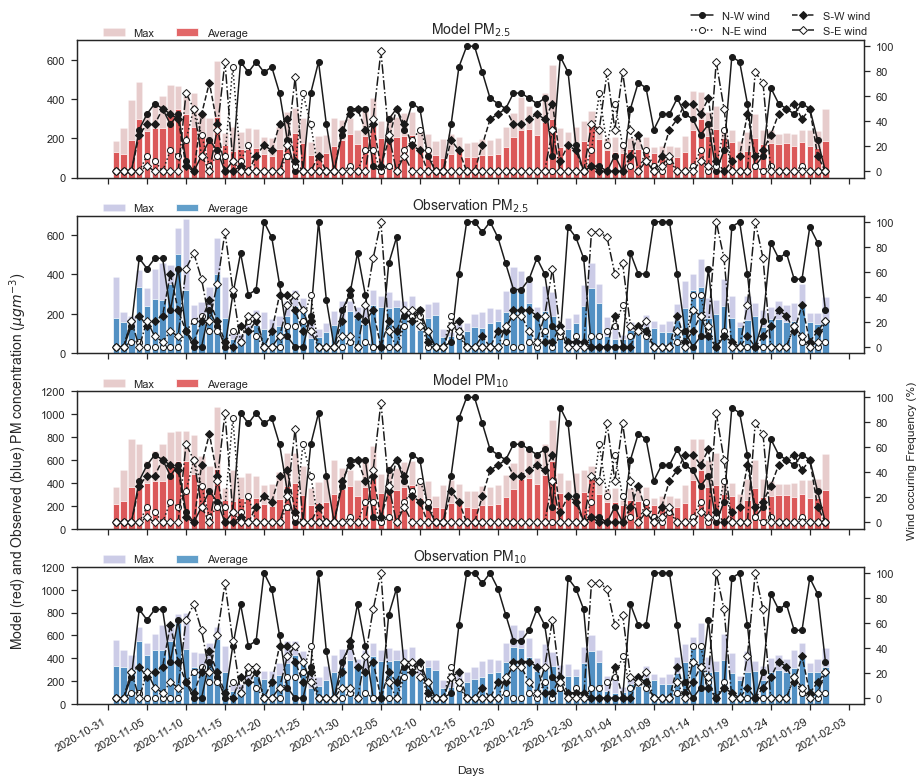

In [37]:
# Combined

fig = plt.figure(figsize = (13,11))
ax1 = plt.subplot(411)

ax1.bar(x = pm_wind_max.index, height = pm_wind_max['mod_PM2.5'], color = 'darkred', alpha=0.2, label='Max')
ax1.bar(x = pm_wind_avg.index, height = pm_wind_avg['mod_PM2.5'], color = 'tab:red', alpha=0.7, label='Average')
# ax1.set_ylabel('Model PM$_{2.5}$ concentration ($\mu g m^{-3}$)', labelpad=12, fontsize=14)
ax1.set_ylim(0,700)
ax1.set_xlabel('Dates', labelpad=12, fontsize=12)
ax1.tick_params('x', labelrotation=30)

ax2 = ax1.twinx()
ax2.plot(pm_wind_avg.index, (pm_wind_avg['mod_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='1', color='k', label='N-W wind')
ax2.plot(pm_wind_avg.index, (pm_wind_avg['mod_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='1', color='k',  label = 'N-E wind')
ax2.plot(pm_wind_avg.index, (pm_wind_avg['mod_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='1', color='k', label = 'S-W wind')
ax2.plot(pm_wind_avg.index, (pm_wind_avg['mod_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='1', color='k', label = 'S-E wind')
# ax2.set_ylim(0,100)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax1.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.16))
ax2.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.02, 1.12))
plt.title('Model PM$_{2.5}$', fontsize=14)

ax3 = plt.subplot(412)
ax3.bar(x = pm_wind_max.index, height = pm_wind_max['obs_PM2.5'], color = 'darkblue', alpha=0.2, label='Max')
ax3.bar(x = pm_wind_avg.index, height = pm_wind_avg['obs_PM2.5'], color = 'tab:blue', alpha=0.7, label='Average')
ax3.set_xlabel('Dates', labelpad=12, fontsize=12)
ax3.tick_params('x', labelrotation=30)
ax3.set_ylim(0,700)

ax4= ax3.twinx()
ax4.plot(pm_wind_avg.index, (pm_wind_avg['obs_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='1', color='k', label='N-W wind')
ax4.plot(pm_wind_avg.index, (pm_wind_avg['obs_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='1', color='k',  label = 'N-E wind')
ax4.plot(pm_wind_avg.index, (pm_wind_avg['obs_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='1', color='k', label = 'S-W wind')
ax4.plot(pm_wind_avg.index, (pm_wind_avg['obs_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='1', color='k', label = 'S-E wind')
# ax01.set_ylabel('Wind occuring Frequency (%)', labelpad=12, fontsize=14)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax3.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.16))
# ax4.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.02, 1.12))
plt.title('Observation PM$_{2.5}$', fontsize=14)

#--------------
ax5 = plt.subplot(413)
ax5.bar(x = pm_wind_max.index, height = pm_wind_max['mod_PM10'], color = 'darkred', alpha=0.2, label='Max')
ax5.bar(x = pm_wind_avg.index, height = pm_wind_avg['mod_PM10'], color = 'tab:red', alpha=0.7, label='Average')
ax5.set_ylim(0,1200)
ax5.set_ylabel('Model (red) and Observed (blue) PM concentration ($\mu g m^{-3}$)', labelpad=12, fontsize=14)
ax5.set_xlabel('Dates', labelpad=12, fontsize=12)
ax5.tick_params('x', labelrotation=30)

ax6 = ax5.twinx()
ax6.plot(pm_wind_avg.index, (pm_wind_avg['mod_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='1', color='k', label='N-W wind')
ax6.plot(pm_wind_avg.index, (pm_wind_avg['mod_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='1', color='k',  label = 'N-E wind')
ax6.plot(pm_wind_avg.index, (pm_wind_avg['mod_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='1', color='k', label = 'S-W wind')
ax6.plot(pm_wind_avg.index, (pm_wind_avg['mod_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='1', color='k', label = 'S-E wind')
ax6.set_ylabel('Wind occuring Frequency (%)', labelpad=13, fontsize=12)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax5.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.16))
# ax6.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.02, 1.12))
plt.title('Model PM$_{10}$', fontsize=14)

ax7 = plt.subplot(414)
ax7.bar(x = pm_wind_max.index, height = pm_wind_max['obs_PM10'], color = 'darkblue', alpha=0.2, label='Max')
ax7.bar(x = pm_wind_avg.index, height = pm_wind_avg['obs_PM10'], color = 'tab:blue', alpha=0.7, label='Average')
ax7.set_ylim(0,1200)
ax7.set_xlabel('Days', labelpad=12, fontsize=12)
ax7.tick_params('x', labelrotation=30)

ax8 = ax7.twinx()
ax8.plot(pm_wind_avg.index, (pm_wind_avg['obs_nwwind'] / 24) * 100, ls='solid', marker='o', mfc='k', mec='k', mew='1', color='k', label='N-W wind')
ax8.plot(pm_wind_avg.index, (pm_wind_avg['obs_newind'] / 24) * 100, ls='dotted', marker='o', mfc='white', mec='k', mew='1', color='k',  label = 'N-E wind')
ax8.plot(pm_wind_avg.index, (pm_wind_avg['obs_swwind'] / 24) * 100, ls='dashed', marker='D', mfc='k', mec='k', mew='1', color='k', label = 'S-W wind')
ax8.plot(pm_wind_avg.index, (pm_wind_avg['obs_sewind'] / 24) * 100, ls='dashdot', marker='D', mfc='white', mec='k', mew='1', color='k', label = 'S-E wind')
# ax8.set_ylabel('Wind occuring Frequency (%)', labelpad=13, fontsize=12)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
ax7.legend(ncol=2, frameon=False, loc='upper left', bbox_to_anchor=(0.02, 1.16))
# ax8.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.02, 1.12))
plt.title('Observation PM$_{10}$', fontsize=14)

fig.autofmt_xdate()
fig.tight_layout()
plt.savefig('./images/met_aqi_compare/wd_pm_combined.pdf', dpi=300)

## Statistical Analysis

In [36]:
from scipy import stats

In [37]:
def get_corr_wd(df, pm, wind, threshold):
    return stats.spearmanr((df[pm]).where((df[wind]/24 * 100) > threshold).dropna(), (df[wind]/24 * 100).where((df[wind]/24 * 100) > threshold).dropna())

#### AVERAGE

**Correlation for model and observed PM2.5 and PM10 with N_W wind for all days**

In [92]:
get_corr_wd(pm_wind_avg_jan, 'mod_PM2.5', 'mod_nwwind', 0)

SpearmanrResult(correlation=-0.366424045009393, pvalue=0.06012377293058788)

In [93]:
get_corr_wd(pm_wind_avg_jan, 'obs_PM2.5', 'obs_nwwind', 0)

SpearmanrResult(correlation=-0.5742094466996535, pvalue=0.0041655589215817005)

In [94]:
get_corr_wd(pm_wind_avg_jan, 'mod_PM10', 'mod_nwwind', 0)

SpearmanrResult(correlation=-0.35508818408518944, pvalue=0.06913519916744973)

In [95]:
get_corr_wd(pm_wind_avg_jan, 'obs_PM10', 'obs_nwwind', 0)

SpearmanrResult(correlation=-0.6453020448624678, pvalue=0.000884062929317357)

**Correlation for model and observed PM2.5 and PM10 with S_W wind for all days**

In [96]:
get_corr_wd(pm_wind_avg_jan, 'mod_PM2.5', 'mod_swwind', 0)

SpearmanrResult(correlation=-0.008324450587817797, pvalue=0.969205496765501)

In [97]:
get_corr_wd(pm_wind_avg_jan, 'obs_PM2.5', 'obs_swwind', 0)

SpearmanrResult(correlation=-0.0106676149412533, pvalue=0.9643972873948057)

In [98]:
get_corr_wd(pm_wind_avg_jan, 'mod_PM10', 'mod_swwind', 0)

SpearmanrResult(correlation=0.08762579566123994, pvalue=0.6839012755273999)

In [99]:
get_corr_wd(pm_wind_avg_jan, 'obs_PM10', 'obs_swwind', 0)

SpearmanrResult(correlation=0.044194404756620814, pvalue=0.8532235966102552)

**Correlation for model and observed PM2.5 and PM10 with S_E wind for all days**

In [100]:
get_corr_wd(pm_wind_avg_jan, 'mod_PM2.5', 'mod_sewind', 0)

SpearmanrResult(correlation=0.11531999522503154, pvalue=0.6823523499552211)

In [101]:
get_corr_wd(pm_wind_avg_jan, 'obs_PM2.5', 'obs_sewind', 0)

SpearmanrResult(correlation=0.20188950260553548, pvalue=0.3801554448367942)

In [102]:
get_corr_wd(pm_wind_avg_jan, 'mod_PM10', 'mod_sewind', 0)

SpearmanrResult(correlation=0.08288624656799143, pvalue=0.7690080344725461)

In [103]:
get_corr_wd(pm_wind_avg_jan, 'obs_PM10', 'obs_sewind', 0)

SpearmanrResult(correlation=0.10094475130276774, pvalue=0.6632892650272607)

**Correlation for model and observed PM2.5 and PM10 with N_E wind for all days**

In [104]:
get_corr_wd(pm_wind_avg_jan, 'mod_PM2.5', 'mod_newind', 0)

SpearmanrResult(correlation=-0.1171423174245646, pvalue=0.6657030352039348)

In [105]:
get_corr_wd(pm_wind_avg_jan, 'obs_PM2.5', 'obs_newind', 0)

SpearmanrResult(correlation=-0.07347722558955386, pvalue=0.7868273966503634)

In [106]:
get_corr_wd(pm_wind_avg_jan, 'mod_PM10', 'mod_newind', 0)

SpearmanrResult(correlation=-0.19729232408347722, pvalue=0.46392443490010615)

In [107]:
get_corr_wd(pm_wind_avg_jan, 'obs_PM10', 'obs_newind', 0)

SpearmanrResult(correlation=-0.023992563457813507, pvalue=0.9297199317773139)